### https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
### Model evaluvation metrics
### regression=MAE,MSE
### classification- classification accuracy

In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)


In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#can we predict the diabetes satus of a patient

In [18]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
#print(pima.label) #name of the column

In [19]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred_class=logreg.predict(X_test)

In [24]:
#classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred_class))

0.692708333333


In [26]:
#NULL accuracy
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [28]:
# calculate percentage of 1 and 0
y_test.mean()
1-y_test.mean()
# a dumb model that predicts no diabetes will have 68% accuracy

0.6770833333333333

In [29]:
# classification accuracy tells nothing about test set===doesnt tell about type of error
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [31]:
# print the first 25 true and predicted responses
print ('True:', y_test.values[0:25])
print ('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
#Model correctly predicts zero every time coorectly
# It takes one type of mistakes

CONFUSION MATRIX


In [33]:
#output= 2x2 numpy array
print(metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]


###  Basic terminology
* True Positives (TP): we correctly predicted that they do have diabetes
* True Negatives (TN): we correctly predicted that they don't have diabetes
* False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
* False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [34]:
# print the first 25 true and predicted responses
print ('True:', y_test.values[0:25])
print ('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]


In [41]:
# classification accuracy from confusin matrics
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


In [46]:
# classifcition error
print((FP+FN)/float(TP + TN + FP + FN))

0.307291666667


Sensitivity: When the actual value is positive, how often is the prediction correct?
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"

In [48]:
#sensitivity
print(TP+float(TP+FN))
print metrics.recall_score(y_test, y_pred_class))

77.0


### Specificity: When the actual value is negative, how often is the prediction correct?
### How "specific" (or "selective") is the classifier in predicting positive instances?

In [50]:
print (TN / float(TN + FP))

0.907692307692


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

* Conclusion:
Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection

### Adjusting the classification threshold¶




In [52]:
#print forst 10 predictions
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [53]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [54]:
# column 1 has class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [63]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline


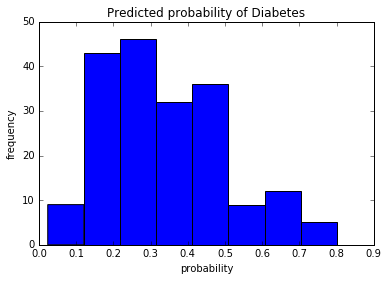

In [61]:
plt.hist(y_pred_prob,bins=8)
plt.xlabel('probability')
plt.title('Predicted probability of Diabetes')
plt.ylabel('frequency')

In [64]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [66]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])